<a href="https://www.kaggle.com/code/vaishnavi05052001/predictive-modeling-for-customer-churn?scriptVersionId=118135797" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-marketing-uci/bank.csv
/kaggle/input/bank-marketing-uci/sample submission .csv
/kaggle/input/bank-marketing-uci/bank-names.txt
/kaggle/input/bank-marketing-uci/test.csv


**Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

**Loading Data**

In [3]:
df = pd.read_csv('/kaggle/input/bank-marketing-uci/bank.csv',sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


**Dimension of the Data**

In [4]:
df.shape

(4521, 17)

**Data Type**

In [5]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

**Target Variable**

In [6]:
df['y']= df['y'].replace(['yes','no'],['1', '2']) 

<AxesSubplot:>

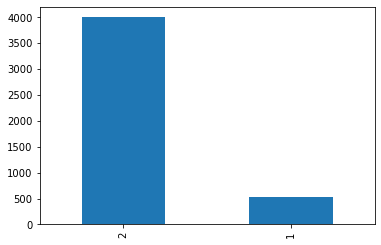

In [7]:
df['y'].value_counts().plot(kind='bar')

**Checking duplicate rows**

In [8]:
df.duplicated().sum()

0

**Checking null values**

In [9]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

**Independent Variable (Categorical)**

<AxesSubplot:xlabel='poutcome', ylabel='count'>

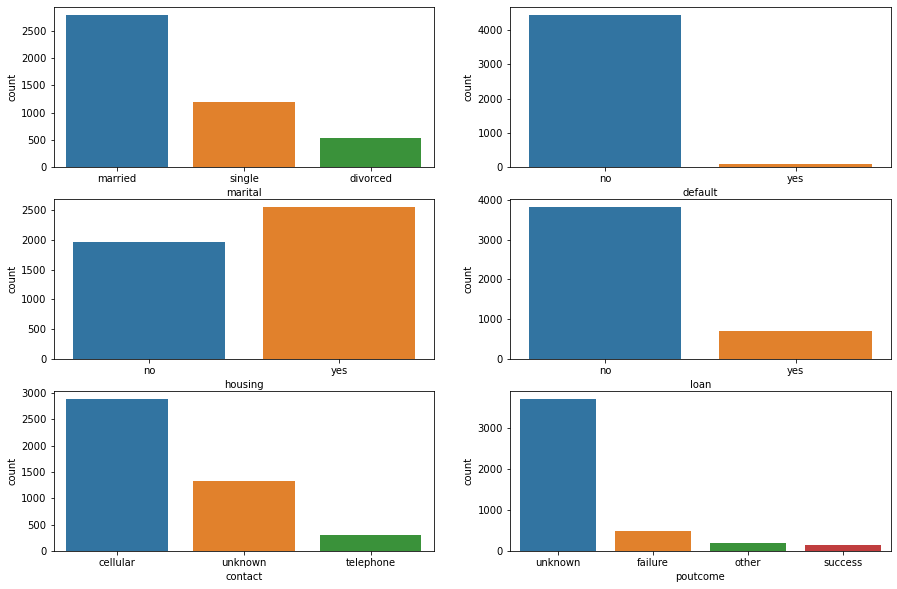

In [10]:
fig, axes = plt.subplots(3,2,figsize=(15,10))
sns.countplot(df['marital'],ax=axes[0,0])
sns.countplot(df['default'],ax=axes[0,1])
sns.countplot(df['housing'],ax=axes[1,0])
sns.countplot(df['loan'],ax=axes[1,1])
sns.countplot(df['contact'],ax=axes[2,0])
sns.countplot(df['poutcome'],ax=axes[2,1])


**Independent Variable (Ordinal)**

<AxesSubplot:xlabel='month', ylabel='count'>

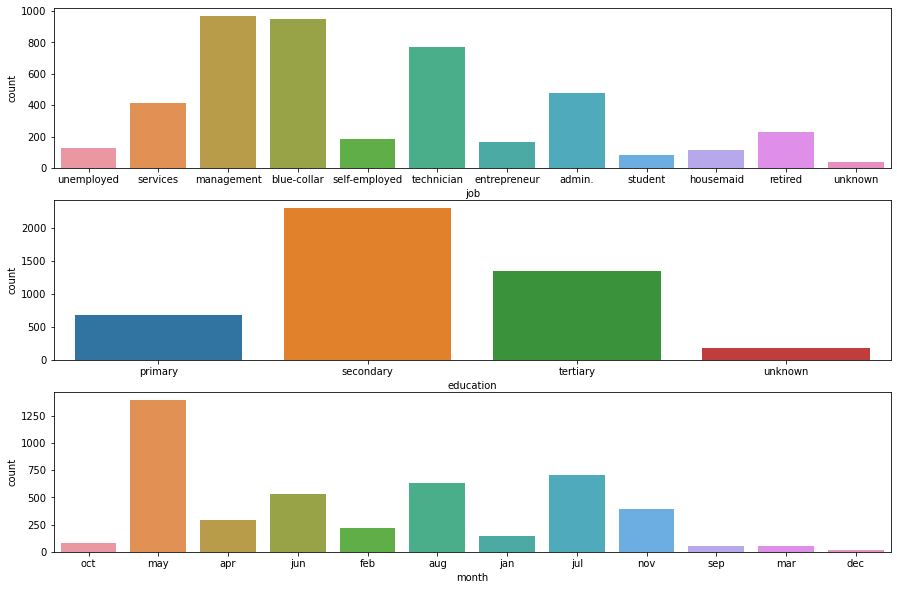

In [11]:
fig, axes = plt.subplots(3,1,figsize=(15,10))
sns.countplot(df['job'],ax=axes[0])
sns.countplot(df['education'],ax=axes[1])
sns.countplot(df['month'],ax=axes[2])


**Independent Variable (Numerical)**

<AxesSubplot:xlabel='previous', ylabel='Density'>

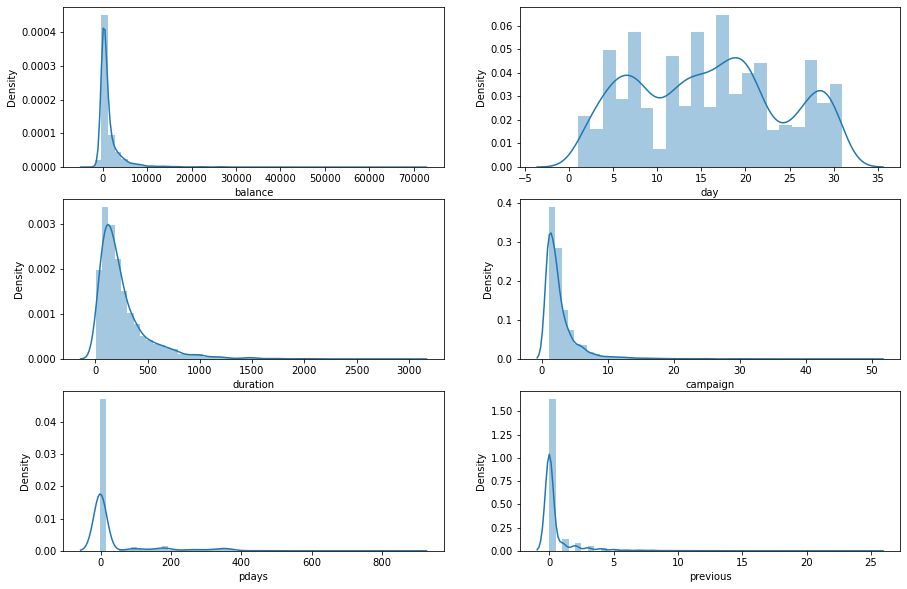

In [12]:
fig, axes = plt.subplots(3,2,figsize=(15,10))
sns.distplot(df['balance'],ax=axes[0,0])
sns.distplot(df['day'],ax=axes[0,1])
sns.distplot(df['duration'],ax=axes[1,0])
sns.distplot(df['campaign'],ax=axes[1,1])
sns.distplot(df['pdays'],ax=axes[2,0])
sns.distplot(df['previous'],ax=axes[2,1])

In [13]:
x = df.drop('y', axis=1) # features
y = df['y'] # labels

x.shape, y.shape

((4521, 16), (4521,))

**Outlier Treatment**

<AxesSubplot:xlabel='y', ylabel='previous'>

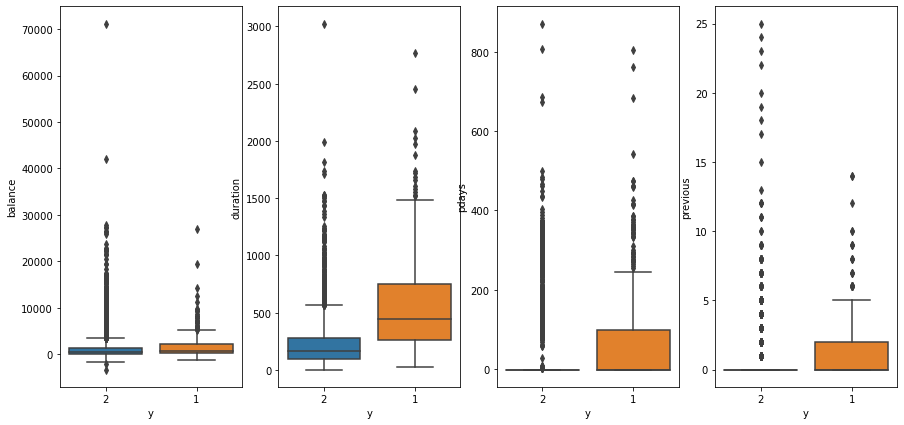

In [14]:
fig, axes = plt.subplots(1,4,figsize=(15,7))
sns.boxplot(y=df['balance'],x=df['y'],ax=axes[0])
sns.boxplot(y=df['duration'],x=df['y'],ax=axes[1])    
sns.boxplot(y=df['pdays'],x=df['y'],ax=axes[2])    
sns.boxplot(y=df['previous'],x=df['y'],ax=axes[3])    


* It can be seen that having outliers often has a significant effect on the mean and standard deviation and hence affecting the distribution. We must take steps to remove outliers from our data sets.

* One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. So, we get a distribution similar to normal distribution.

In [15]:
df['balance']=np.log(df['balance'])
df['duration']=np.log(df['duration'])    
df['pdays']=np.log(df['pdays'])    
df['previous']=np.log(df['previous'])    

**Label Encoding**

In [16]:
from sklearn.preprocessing import LabelEncoder
x['job'] = LabelEncoder().fit_transform(x['job'])
x['marital'] = LabelEncoder().fit_transform(x['marital'])
x['education'] = LabelEncoder().fit_transform(x['education'])
x['default'] = LabelEncoder().fit_transform(x['default'])
x['housing'] = LabelEncoder().fit_transform(x['housing'])
x['loan'] = LabelEncoder().fit_transform(x['loan'])
x['contact'] = LabelEncoder().fit_transform(x['contact'])
x['month'] = LabelEncoder().fit_transform(x['month'])
x['poutcome'] = LabelEncoder().fit_transform(x['poutcome'])


**Train_test_split**

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.3)

In [18]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

model = LogisticRegression() 
model.fit(x_train, y_train)

LogisticRegression()

In [19]:
pred_train = model.predict(x_train)
accuracy_score(y_train,pred_train)

0.8859039190897599

In [20]:
from sklearn.model_selection import StratifiedKFold

In [21]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(x,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = x.loc[train_index],x.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = LogisticRegression(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1
    
pred_test = model.predict(x_test) 
pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.8895027624309392

2 of kfold 5
accuracy_score 0.8838495575221239

3 of kfold 5
accuracy_score 0.879424778761062

4 of kfold 5
accuracy_score 0.8982300884955752

5 of kfold 5
accuracy_score 0.8893805309734514


In [22]:
from sklearn import tree

In [23]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(x,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = x.loc[train_index],x.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = tree.DecisionTreeClassifier(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1
    
pred_test = model.predict(x_test)


1 of kfold 5
accuracy_score 0.8651933701657458

2 of kfold 5
accuracy_score 0.8661504424778761

3 of kfold 5
accuracy_score 0.8573008849557522

4 of kfold 5
accuracy_score 0.875

5 of kfold 5
accuracy_score 0.8595132743362832


In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators 
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}

In [27]:
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

In [28]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.3, random_state=1)

In [29]:
# Fit the grid search model 
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [30]:
# Estimating the optimized value 
grid_search.best_estimator_

RandomForestClassifier(max_depth=11, n_estimators=101, random_state=1)

In [31]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(x,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = x.loc[train_index],x.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = RandomForestClassifier(random_state=1, max_depth=11, n_estimators=101)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
pred_test = model.predict(x_test) 
pred2=model.predict_proba(x_test)[:,1]


1 of kfold 5
accuracy_score 0.901657458563536

2 of kfold 5
accuracy_score 0.8926991150442478

3 of kfold 5
accuracy_score 0.8949115044247787

4 of kfold 5
accuracy_score 0.8904867256637168

5 of kfold 5
accuracy_score 0.8982300884955752


In [32]:
from sklearn.ensemble import GradientBoostingClassifier

In [33]:
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(x,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = x.loc[train_index],x.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = GradientBoostingClassifier(n_estimators=50, max_depth=4)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1
    
pred_test = model.predict(x_test) 
pred3=model.predict_proba(x_test)[:,1]


6 of kfold 5
accuracy_score 0.8983425414364641

7 of kfold 5
accuracy_score 0.8993362831858407

8 of kfold 5
accuracy_score 0.875

9 of kfold 5
accuracy_score 0.9092920353982301

10 of kfold 5
accuracy_score 0.8926991150442478
